In [1]:
import numpy as np
from models.NN import NearestNeighbour
from models.helper import *
import  pandas as pd
from  datetime import  datetime

C:\Users\SBK\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# PART 1

## Load Dataset and Preparing For Model

In [2]:
audit = pd.read_csv('data/audit_risk.csv')
audit.tail()
Y = audit['Risk'].values
X = audit.drop(['Risk'],axis=1).values
X = str_to_int(X,1)

In [3]:
X , Y

(array([[3.89, 23, 4.18, ..., 0.4, 0.5, 1.7148],
        [3.89, 6, 0.0, ..., 0.4, 0.5, 0.5108],
        [3.89, 6, 0.51, ..., 0.4, 0.5, 0.3096],
        ...,
        [55.57, 14, 0.24, ..., 0.4, 0.5, 0.2912],
        [55.57, 18, 0.2, ..., 0.4, 0.5, 0.288],
        [55.57, 15, 0.0, ..., 0.4, 0.5, 0.2928]], dtype=object),
 array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
        1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
        0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 

In [4]:
minmax = dataset_minmax(X)
minmax

[[0, 23],
 [0.0, 6],
 [0.0, 6],
 [0.0, 17.53],
 [0.0, 6],
 [0.0, 6],
 [0, 44.95],
 [0, 20.53],
 [0, 19.45],
 [0, 8],
 [0, 16.2],
 [0.192, 55.52],
 [0.2, 14.392],
 [0.0, 8],
 [0.0, 8],
 [0, 13],
 [0.2, 50.67],
 [0, 37],
 [0.0, 37],
 [0, 71.492],
 [0.2, 34.56],
 [0, 5.96],
 [0.2, 205.19],
 [0, 5.0],
 [0, 63.7],
 [0, 9.66],
 [0.0, 5.0],
 [0, 38.61],
 [0.0, 14],
 [0.0, 37],
 [0, 37],
 [0.0, 152.41],
 [0.0, 5],
 [0.0, 5],
 [0.0, 5],
 [0.0, 5],
 [0, 28.83],
 [0.0, 19],
 [0, 46.718],
 [0, 935.03],
 [0.0, 29.63],
 [0, 19],
 [0.0, 19],
 [0.0, 19],
 [0.0, 19],
 [0.0, 19],
 [0.0, 126.13],
 [0.0, 21],
 [0.0, 27.5],
 [0, 156.92],
 [0, 22],
 [0.0, 22],
 [0.0, 22],
 [0.0, 9],
 [0, 15.33],
 [0.0, 9],
 [0.0, 47.9],
 [0, 24.87],
 [0.2, 24.69],
 [0.0, 11],
 [0.0, 11],
 [0.0, 11],
 [0.0, 12],
 [0.0, 15.82],
 [0.116, 17.79],
 [0.2, 215.31],
 [0.0, 12],
 [0, 16.12],
 [0.0, 12],
 [0.0, 12],
 [0.0, 53.34],
 [0.2, 84.26],
 [0, 29],
 [0, 84.73],
 [0.0, 29],
 [0, 30],
 [0.0, 63.13],
 [0, 31],
 [0, 102.22],
 [0.0

In [5]:
X = normalize_dataset(X,minmax)
X

array([[0.1691304347826087, 3.8333333333333335, 0.6966666666666667, ...,
        0.08, 0.007849293563579277, 0.17751552795031056],
       [0.1691304347826087, 1.0, 0.0, ..., 0.08, 0.007849293563579277,
        0.05287784679089027],
       [0.1691304347826087, 1.0, 0.085, ..., 0.08, 0.007849293563579277,
        0.03204968944099379],
       ...,
       [2.416086956521739, 2.3333333333333335, 0.04, ..., 0.08,
        0.007849293563579277, 0.030144927536231884],
       [2.416086956521739, 3.0, 0.03333333333333333, ..., 0.08,
        0.007849293563579277, 0.029813664596273288],
       [2.416086956521739, 2.5, 0.0, ..., 0.08, 0.007849293563579277,
        0.03031055900621118]], dtype=object)

In [6]:
dataset = np.zeros(shape=(X.shape[0],X.shape[1]+1))
dataset[:,:-1] = X
dataset[:,-1] = Y
dataset

array([[0.16913043, 3.83333333, 0.69666667, ..., 0.00784929, 0.17751553,
        1.        ],
       [0.16913043, 1.        , 0.        , ..., 0.00784929, 0.05287785,
        0.        ],
       [0.16913043, 1.        , 0.085     , ..., 0.00784929, 0.03204969,
        0.        ],
       ...,
       [2.41608696, 2.33333333, 0.04      , ..., 0.00784929, 0.03014493,
        0.        ],
       [2.41608696, 3.        , 0.03333333, ..., 0.00784929, 0.02981366,
        0.        ],
       [2.41608696, 2.5       , 0.        , ..., 0.00784929, 0.03031056,
        0.        ]])

In [7]:
dataset = dataset.tolist()

In [8]:
folds = cross_validation(dataset,6)
folds

[[[0.08043478260869566,
   5.166666666666667,
   0.0016666666666666668,
   0.011409013120365089,
   0.0003333333333333333,
   0.15166666666666667,
   0.004449388209121246,
   0.008865075499269362,
   0.047300771208226226,
   0.625,
   0.01234567901234568,
   0.014603817235396183,
   -0.014092446448703496,
   0.025,
   0.0,
   0.15384615384615385,
   0.0,
   0.010810810810810811,
   0.0,
   0.0027975158059643035,
   -0.005820721769499418,
   0.33557046979865773,
   0.006751548856041759,
   0.08,
   0.007849293563579277,
   0.03279503105590063,
   0.0],
  [0.10304347826086957,
   5.333333333333333,
   0.10166666666666667,
   0.011409013120365089,
   0.02033333333333333,
   0.25666666666666665,
   0.008898776418242492,
   0.030004870920603992,
   0.11053984575835475,
   0.625,
   0.01234567901234568,
   0.014603817235396183,
   0.026071025930101462,
   0.025,
   0.01425,
   0.15384615384615385,
   0.0,
   0.010810810810810811,
   0.0,
   0.0027975158059643035,
   -0.005820721769499418,
  

## Fit to NN and calculate Confusion Matrix

In [9]:
start_time = datetime.now()
for i in range(len(folds)):
    train_set = list(folds)
    train_set.remove(folds[i])
    train_set = sum(train_set, [])
    test_set = list()
    actual_label = [x[-1] for x in folds[i]]
    for row in folds[i]:
        row_copy = list(row)
        test_set.append(row_copy)
        row_copy[-1] = None
    print(f"------------------FOLD {i+1}-----------------------")
    model = NearestNeighbour(k=3,train=train_set,test=test_set,distance_method='euclidean')
    result = model.predict_classification()
    cm = confusion_matrix(actual_label,result)
    print("-------------------------------------------------------")
print("Total time Test KNN seconds:", (datetime.now()-start_time).total_seconds())


------------------FOLD 1-----------------------
Confusion Matrix:
True\Predicted	0	1	
0		85	1	
1		2	41	
Precision: 0.9761904761904762
Recall: 0.9534883720930233
Accuracy: 0.9767441860465116
-------------------------------------------------------
------------------FOLD 2-----------------------
Confusion Matrix:
True\Predicted	0	1	
0		75	1	
1		6	47	
Precision: 0.9791666666666666
Recall: 0.8867924528301887
Accuracy: 0.9457364341085271
-------------------------------------------------------
------------------FOLD 3-----------------------
Confusion Matrix:
True\Predicted	0	1	
0		75	1	
1		14	39	
Precision: 0.975
Recall: 0.7358490566037735
Accuracy: 0.8837209302325582
-------------------------------------------------------
------------------FOLD 4-----------------------
Confusion Matrix:
True\Predicted	0	1	
0		76	0	
1		3	50	
Precision: 1.0
Recall: 0.9433962264150944
Accuracy: 0.9767441860465116
-------------------------------------------------------
------------------FOLD 5-------------------

# PART 2

# PART 3

------------------FOLD 1-----------------------


<Figure size 640x480 with 0 Axes>

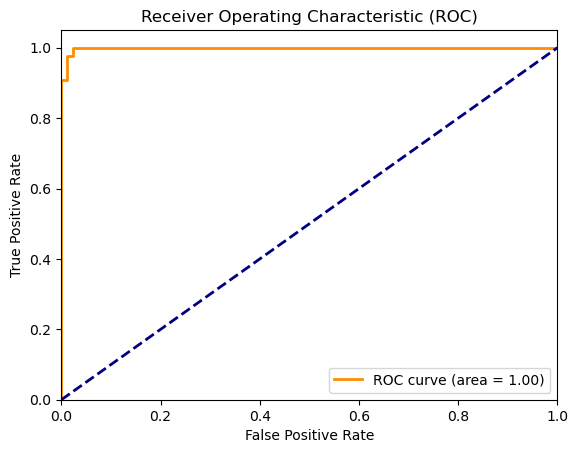

Confusion Matrix:
True\Predicted	0	1	
0		84	2	
1		0	43	
Precision: 0.9555555555555556
Recall: 1.0
Accuracy: 0.9844961240310077
--------------------------------------------------
------------------FOLD 2-----------------------


<Figure size 640x480 with 0 Axes>

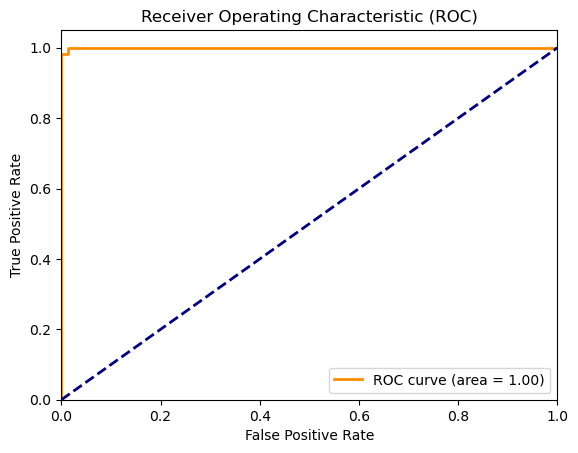

Confusion Matrix:
True\Predicted	0	1	
0		76	0	
1		1	52	
Precision: 1.0
Recall: 0.9811320754716981
Accuracy: 0.9922480620155039
--------------------------------------------------
------------------FOLD 3-----------------------


<Figure size 640x480 with 0 Axes>

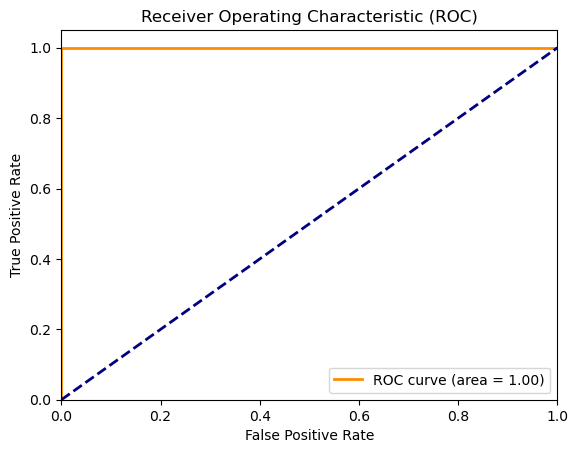

Confusion Matrix:
True\Predicted	0	1	
0		76	0	
1		4	49	
Precision: 1.0
Recall: 0.9245283018867925
Accuracy: 0.9689922480620154
--------------------------------------------------
------------------FOLD 4-----------------------


<Figure size 640x480 with 0 Axes>

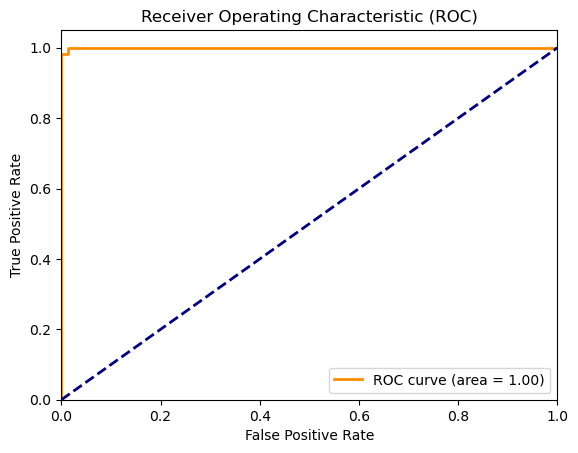

Confusion Matrix:
True\Predicted	0	1	
0		76	0	
1		1	52	
Precision: 1.0
Recall: 0.9811320754716981
Accuracy: 0.9922480620155039
--------------------------------------------------
------------------FOLD 5-----------------------


<Figure size 640x480 with 0 Axes>

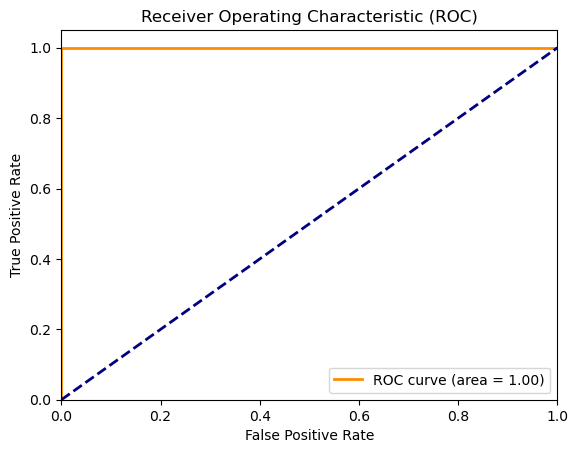

Confusion Matrix:
True\Predicted	0	1	
0		80	1	
1		0	48	
Precision: 0.9795918367346939
Recall: 1.0
Accuracy: 0.9922480620155039
--------------------------------------------------
------------------FOLD 6-----------------------


<Figure size 640x480 with 0 Axes>

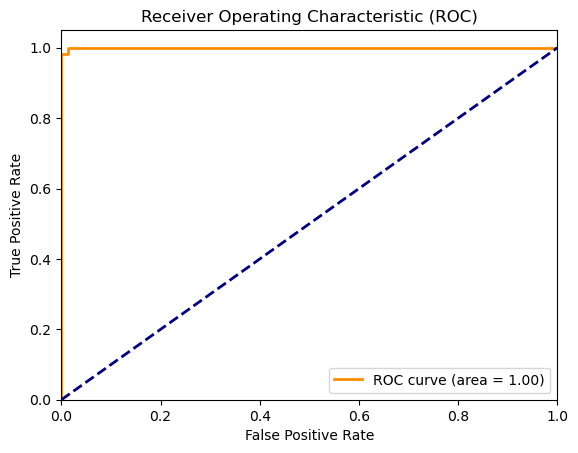

Confusion Matrix:
True\Predicted	0	1	
0		73	1	
1		1	54	
Precision: 0.9818181818181818
Recall: 0.9818181818181818
Accuracy: 0.9844961240310077
--------------------------------------------------
Total time Test SVC seconds: 0.554116


In [10]:
from sklearn.svm import  SVC
from sklearn.metrics import roc_curve, auc
import  matplotlib.pyplot as plt


model_cls_svm = SVC(kernel='linear',probability=True)
start_time = datetime.now()
for i in range(len(folds)):
    train_set = list(folds)
    train_set.remove(folds[i])
    train_set = sum(train_set, [])
    test_set = list()

    for row in folds[i]:
        row_copy = list(row)
        test_set.append(row_copy)
        row_copy[-1] = None
    print(f"------------------FOLD {i+1}-----------------------")
    X_train = np.array([x[:-1] for x in train_set]).astype(np.float64)
    #! there  is a nan value that is why apply nan_to_num method X_train
    X_train = np.nan_to_num(X_train)
    y_train = np.array([x[-1] for x in train_set]).astype(np.float64)
    y_test =  np.array([x[-1] for x in folds[i]])
    x_test = np.array([x[:-1] for x in folds[i]])
    #there  is a nan value that is why apply nan_to_num method X_train
    x_test = np.nan_to_num(x_test)
    model_cls_svm.fit(X_train,y_train)
    result = model_cls_svm.predict(x_test)
    # ROC
    y_probs = model_cls_svm.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.clf()
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
    # Confusion Matrix
    cm = confusion_matrix(y_test,result)
    print("--------------------------------------------------")
print("Total time Test SVC seconds:", (datetime.now()-start_time).total_seconds())

# PART 4

# PART 5
* Build a classifier based on the radial basis function SVM.

------------------FOLD 1-----------------------


<Figure size 640x480 with 0 Axes>

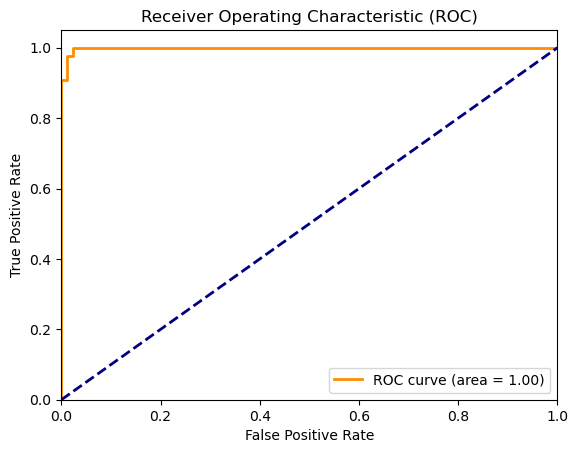

Confusion Matrix:
True\Predicted	0	1	
0		84	2	
1		0	43	
Precision: 0.9555555555555556
Recall: 1.0
Accuracy: 0.9844961240310077
--------------------------------------------------
------------------FOLD 2-----------------------


<Figure size 640x480 with 0 Axes>

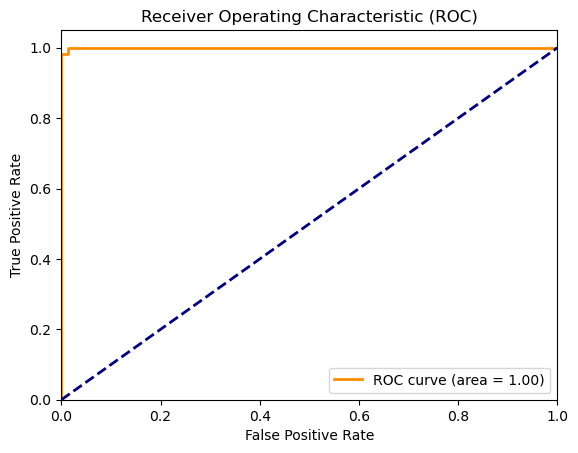

Confusion Matrix:
True\Predicted	0	1	
0		76	0	
1		1	52	
Precision: 1.0
Recall: 0.9811320754716981
Accuracy: 0.9922480620155039
--------------------------------------------------
------------------FOLD 3-----------------------


<Figure size 640x480 with 0 Axes>

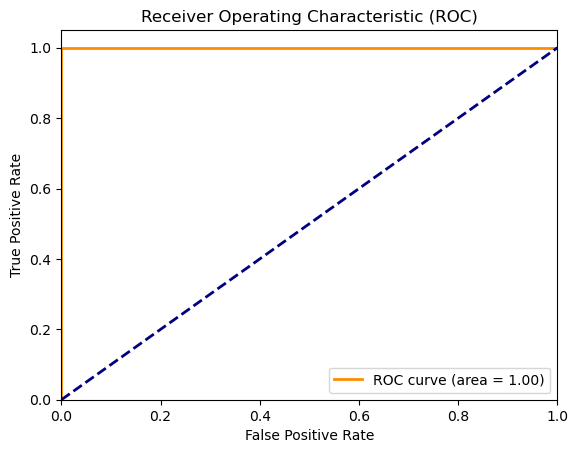

Confusion Matrix:
True\Predicted	0	1	
0		76	0	
1		4	49	
Precision: 1.0
Recall: 0.9245283018867925
Accuracy: 0.9689922480620154
--------------------------------------------------
------------------FOLD 4-----------------------


<Figure size 640x480 with 0 Axes>

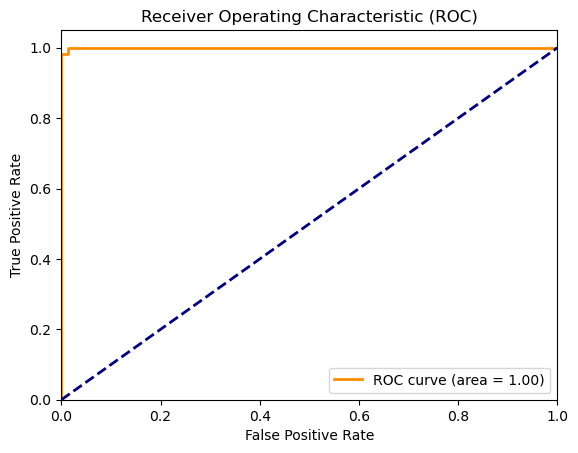

Confusion Matrix:
True\Predicted	0	1	
0		76	0	
1		1	52	
Precision: 1.0
Recall: 0.9811320754716981
Accuracy: 0.9922480620155039
--------------------------------------------------
------------------FOLD 5-----------------------


<Figure size 640x480 with 0 Axes>

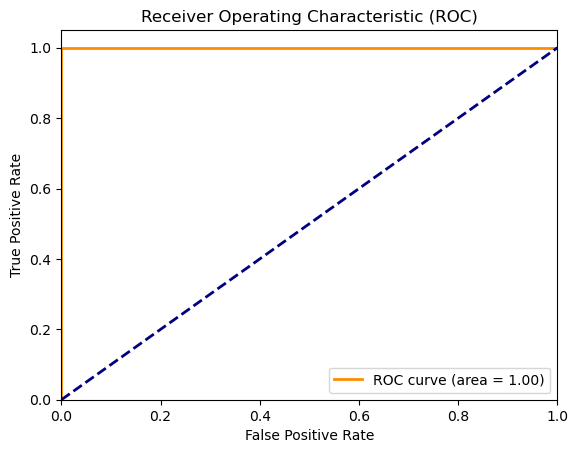

Confusion Matrix:
True\Predicted	0	1	
0		80	1	
1		0	48	
Precision: 0.9795918367346939
Recall: 1.0
Accuracy: 0.9922480620155039
--------------------------------------------------
------------------FOLD 6-----------------------


<Figure size 640x480 with 0 Axes>

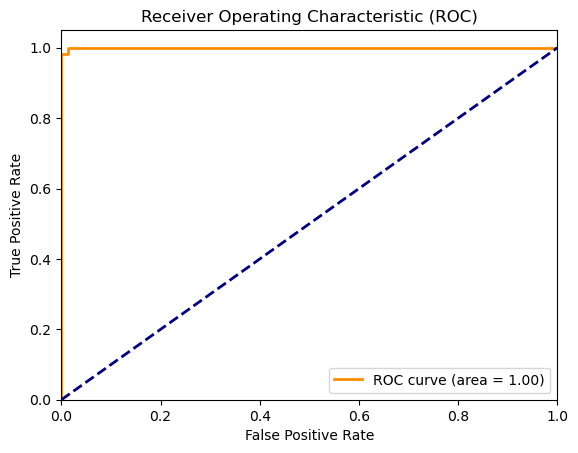

Confusion Matrix:
True\Predicted	0	1	
0		73	1	
1		1	54	
Precision: 0.9818181818181818
Recall: 0.9818181818181818
Accuracy: 0.9844961240310077
--------------------------------------------------
Total time Test SVC seconds: 0.604417


In [11]:
model_cls_svm_radial = SVC(kernel='rbf',probability=True)
start_time = datetime.now()
for i in range(len(folds)):
    train_set = list(folds)
    train_set.remove(folds[i])
    train_set = sum(train_set, [])
    test_set = list()

    for row in folds[i]:
        row_copy = list(row)
        test_set.append(row_copy)
        row_copy[-1] = None
    print(f"------------------FOLD {i+1}-----------------------")
    X_train = np.array([x[:-1] for x in train_set]).astype(np.float64)
    #! there  is a nan value that is why apply nan_to_num method X_train
    X_train = np.nan_to_num(X_train)
    y_train = np.array([x[-1] for x in train_set]).astype(np.float64)
    y_test =  np.array([x[-1] for x in folds[i]])
    x_test = np.array([x[:-1] for x in folds[i]])
    #there  is a nan value that is why apply nan_to_num method X_train
    x_test = np.nan_to_num(x_test)
    model_cls_svm.fit(X_train,y_train)
    result = model_cls_svm.predict(x_test)
    # ROC
    y_probs = model_cls_svm.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.clf()
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
    # Confusion Matrix
    cm = confusion_matrix(y_test,result)
    print("--------------------------------------------------")
print("Total time Test SVC seconds:", (datetime.now()-start_time).total_seconds())

# PART 6
* Build a classifier based on DT (Decision Trees).

## 1. Pre pruning techniques
Pre pruning is nothing but stoping the growth of decision tree on an early stage. For that we can limit the growth of trees by setting constrains. We can limit parameters like max_depth , min_samples etc.

An effective way to do is that we can grid search those parameters and choose the optimum values that gives better performace on test data.

As of now we will control these parameters

* max_depth: maximum depth of decision tree
* min_sample_split: The minimum number of samples required to split an internal node:
* min_samples_leaf: The minimum number of samples required to be at a leaf node.

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn import  tree

params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
feature_names = audit.keys().tolist()[:-1] #this is for export tree nodes

start_time = datetime.now()
for i in range(len(folds)):
    train_set = list(folds)
    train_set.remove(folds[i])
    train_set = sum(train_set, [])
    test_set = list()

    for row in folds[i]:
        row_copy = list(row)
        test_set.append(row_copy)
        row_copy[-1] = None
    print(f"------------------FOLD {i+1}-----------------------")
    X_train = np.array([x[:-1] for x in train_set]).astype(np.float64)
    #! there  is a nan value that is why apply nan_to_num method X_train
    X_train = np.nan_to_num(X_train)
    y_train = np.array([x[-1] for x in train_set]).astype(np.float64)
    y_test =  np.array([x[-1] for x in folds[i]])
    x_test = np.array([x[:-1] for x in folds[i]])
    #there  is a nan value that is why apply nan_to_num method X_train
    x_test = np.nan_to_num(x_test)
    gcv = GridSearchCV(estimator=clf,param_grid=params)
    gcv.fit(X_train,y_train)
    model_tree = gcv.best_estimator_
    model_tree.fit(X_train,y_train)
    result = model_tree.predict(x_test)
    cm = confusion_matrix(y_test,result)
    rules = tree_to_rules(model_tree,feature_names)
    print('Decision Tree of Rules path:')
    [print(rule) for rule in rules]
    print("--------------------------------------------------")
print("Total time Test SVC seconds:", (datetime.now()-start_time).total_seconds())


------------------FOLD 1-----------------------
Confusion Matrix:
True\Predicted	0	1	
0		86	0	
1		0	43	
Precision: 1.0
Recall: 1.0
Accuracy: 1.0
['Audit_Risk <= 0.10391304269433022 and class: 0', 'Audit_Risk > 0.10391304269433022 and class: 1']
--------------------------------------------------
------------------FOLD 2-----------------------
Confusion Matrix:
True\Predicted	0	1	
0		76	0	
1		0	53	
Precision: 1.0
Recall: 1.0
Accuracy: 1.0
['Audit_Risk <= 0.10399585962295532 and class: 0', 'Audit_Risk > 0.10399585962295532 and class: 1']
--------------------------------------------------
------------------FOLD 3-----------------------
Confusion Matrix:
True\Predicted	0	1	
0		76	0	
1		0	53	
Precision: 1.0
Recall: 1.0
Accuracy: 1.0
['Audit_Risk <= 0.10465838387608528 and class: 0', 'Audit_Risk > 0.10465838387608528 and class: 1']
--------------------------------------------------
------------------FOLD 4-----------------------
Confusion Matrix:
True\Predicted	0	1	
0		76	0	
1		0	53	
Precisio

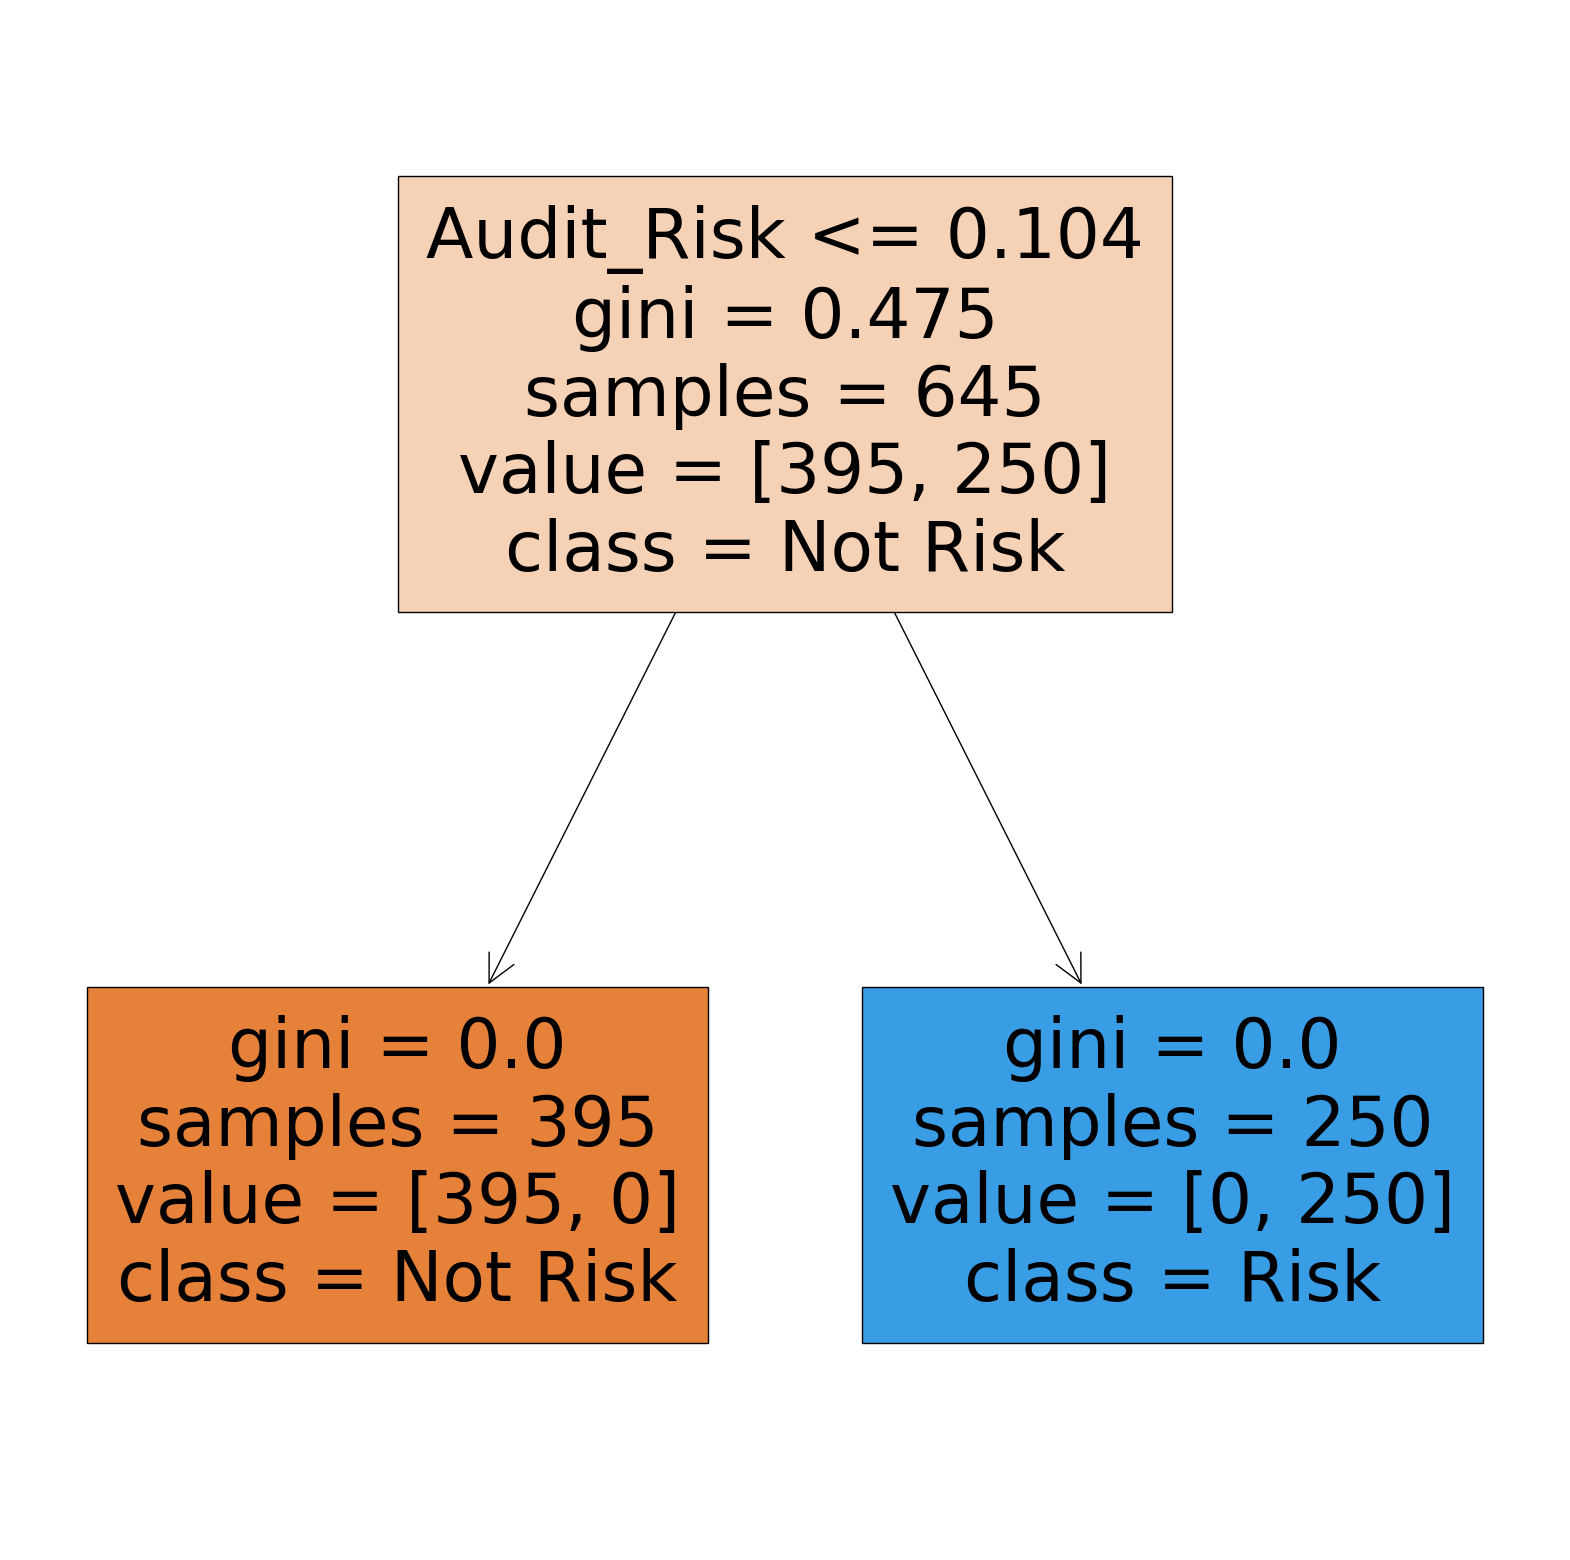

In [13]:
plt.figure(figsize=(20,20))
features = audit.columns
classes = ['Not Risk','Risk']
tree.plot_tree(model_tree,feature_names=features,class_names=classes,filled=True)
plt.show()

## 2. Post pruning techniques
/*Cost Complexity Pruning*/
Decision trees can easily overfit. One way to avoid it is to limit the growth of trees by setting constrains. We can limit parameters like max_depth , min_samples etc. But a most effective way is to use post pruning methods like cost complexity pruning. This helps to improve test accuracy and get a better model.

Cost complexity pruning is all about finding the right parameter for alpha.We will get the alpha values for this tree and will check the accuracy with the pruned trees.

In [15]:
clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
feature_names = audit.keys().tolist()[:-1] #this is for export tree nodes

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.47473109]


In [18]:
model_tree_post = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.4747)
start_time = datetime.now()
for i in range(len(folds)):
    train_set = list(folds)
    train_set.remove(folds[i])
    train_set = sum(train_set, [])
    test_set = list()

    for row in folds[i]:
        row_copy = list(row)
        test_set.append(row_copy)
        row_copy[-1] = None
    print(f"------------------FOLD {i+1}-----------------------")
    X_train = np.array([x[:-1] for x in train_set]).astype(np.float64)
    #! there  is a nan value that is why apply nan_to_num method X_train
    X_train = np.nan_to_num(X_train)
    y_train = np.array([x[-1] for x in train_set]).astype(np.float64)
    y_test =  np.array([x[-1] for x in folds[i]])
    x_test = np.array([x[:-1] for x in folds[i]])
    #there  is a nan value that is why apply nan_to_num method X_train
    x_test = np.nan_to_num(x_test)
    model_tree_post.fit(X_train,y_train)
    result = model_tree_post.predict(x_test)
    cm = confusion_matrix(y_test,result)
    rules = tree_to_rules(model_tree,feature_names)
    print('Decision Tree of Rules path:')
    [print(rule) for rule in rules]
    print("--------------------------------------------------")
print("Total time Test SVC seconds:", (datetime.now()-start_time).total_seconds())

------------------FOLD 1-----------------------
Confusion Matrix:
True\Predicted	0	1	
0		86	0	
1		0	43	
Precision: 1.0
Recall: 1.0
Accuracy: 1.0
Decision Tree of Rules path:
Audit_Risk <= 0.10399585962295532 and class: 0
Audit_Risk > 0.10399585962295532 and class: 1
--------------------------------------------------
------------------FOLD 2-----------------------
Confusion Matrix:
True\Predicted	0	1	
0		76	0	
1		0	53	
Precision: 1.0
Recall: 1.0
Accuracy: 1.0
Decision Tree of Rules path:
Audit_Risk <= 0.10399585962295532 and class: 0
Audit_Risk > 0.10399585962295532 and class: 1
--------------------------------------------------
------------------FOLD 3-----------------------
Confusion Matrix:
True\Predicted	0	1	
0		76	0	
1		0	53	
Precision: 1.0
Recall: 1.0
Accuracy: 1.0
Decision Tree of Rules path:
Audit_Risk <= 0.10399585962295532 and class: 0
Audit_Risk > 0.10399585962295532 and class: 1
--------------------------------------------------
------------------FOLD 4----------------------